In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
game_summary = pd.read_csv("game_summary.csv")
line_score = pd.read_csv("line_score.csv")
other_stats = pd.read_csv("other_stats.csv")
game = pd.read_csv("game.csv")

In [3]:
line_score = line_score[["game_id", "game_date_est", "team_id_home", "team_id_away", "pts_home", "pts_away"]]

other_stats = other_stats[[
    "game_id", "team_id_home", "team_id_away",
    "pts_paint_home", "pts_paint_away", "pts_fb_home", "pts_fb_away", 
    "pts_2nd_chance_home", "pts_2nd_chance_away",
    "largest_lead_home", "largest_lead_away", "lead_changes", "times_tied",
    "team_turnovers_home", "team_turnovers_away", 
    "total_turnovers_home", "total_turnovers_away",
    "team_rebounds_home", "team_rebounds_away",
    "pts_off_to_home", "pts_off_to_away"]]

game = game[[
    "game_id", "season_id", "team_id_home", "team_id_away", 
    "fg3m_home", "fg3a_home", "fg3_pct_home", "fg3m_away", "fg3a_away", "fg3_pct_away",
    "fgm_home", "fga_home", "fg_pct_home", "fgm_away", "fga_away", "fg_pct_away",
    "reb_home", "reb_away", "ast_home", "ast_away",
    "tov_home", "tov_away"]]

merged_df = (game_summary.merge(line_score, on="game_id").merge(other_stats, on="game_id").merge(game, on="game_id"))

merged_df = merged_df[[
    "season_id", "team_id_home", "team_id_away", "game_id",
    "fg3m_home", "fg3a_home", "fg3_pct_home", "fg3m_away", "fg3a_away", "fg3_pct_away",
    "pts_home", "pts_away", "pts_paint_home", "pts_paint_away",
    "pts_fb_home", "pts_fb_away", "pts_2nd_chance_home", "pts_2nd_chance_away",
    "reb_home", "reb_away", "ast_home", "ast_away",
    "tov_home", "tov_away", "team_turnovers_home", "team_turnovers_away",
    "total_turnovers_home", "total_turnovers_away",
    "team_rebounds_home", "team_rebounds_away", "lead_changes", "times_tied"]]


In [9]:
merged_df["season_id"] = merged_df["season_id"].astype(str).str[-4:].astype(int)
season_trends = merged_df.groupby("season_id").mean()
season_trends_filtered = season_trends[season_trends.index >= 2000]
merged_df.to_csv("nba_playstyle_trends.csv", index=False)
print("\nCleaned dataset saved as nba_playstyle_trends.csv")


Cleaned dataset saved as nba_playstyle_trends.csv


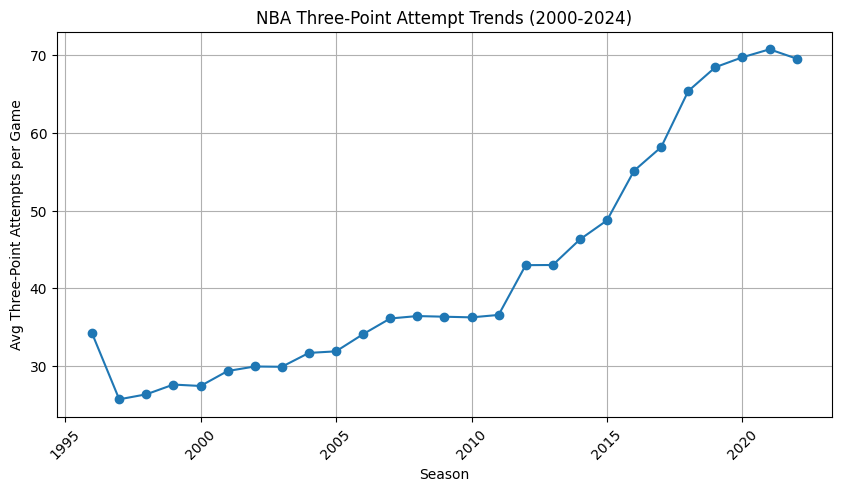

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(season_trends.index, season_trends["fg3a_home"] + season_trends["fg3a_away"], marker="o", linestyle="-")
plt.xlabel("Season")
plt.ylabel("Avg Three-Point Attempts per Game")
plt.title("NBA Three-Point Attempt Trends (2000-2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

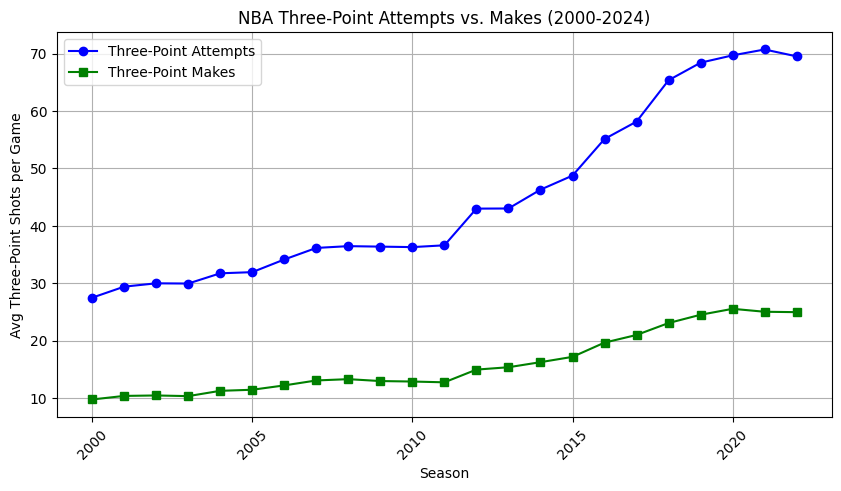

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(season_trends_filtered.index, season_trends_filtered["fg3a_home"] + season_trends_filtered["fg3a_away"], 
         marker="o", linestyle="-", color="blue", label="Three-Point Attempts")
plt.plot(season_trends_filtered.index, season_trends_filtered["fg3m_home"] + season_trends_filtered["fg3m_away"], 
         marker="s", linestyle="-", color="green", label="Three-Point Makes")
plt.xlabel("Season")
plt.ylabel("Avg Three-Point Shots per Game")
plt.title("NBA Three-Point Attempts vs. Makes (2000-2024)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

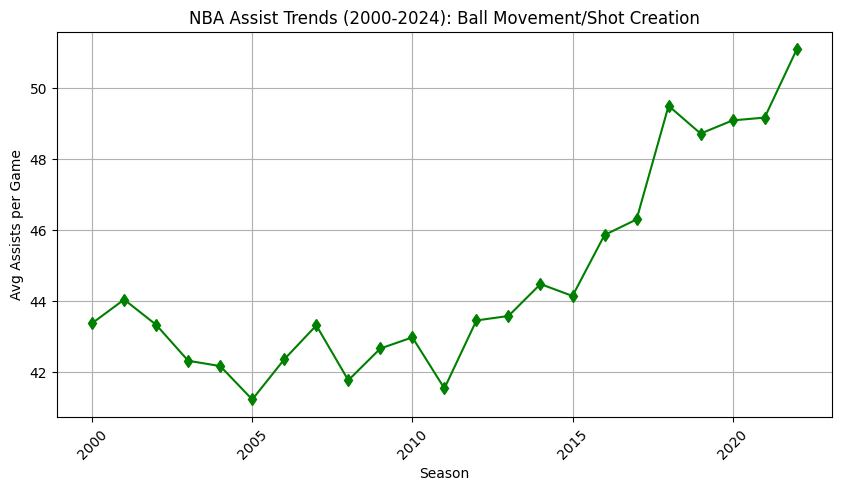

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(season_trends_filtered.index, season_trends_filtered["ast_home"] + season_trends_filtered["ast_away"], marker="d", linestyle="-", color="green")
plt.xlabel("Season")
plt.ylabel("Avg Assists per Game")
plt.title("NBA Assist Trends (2000-2024): Ball Movement/Shot Creation")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()